C:\Users\rxiau6-PC\.conda\envs\gis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

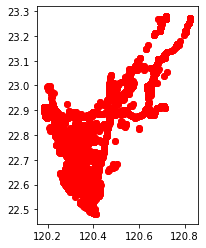

In [39]:
import auth
import geopandas as gpd
import pandas as pd
import requests as rq
import json
from shapely.geometry import Point
app_id = auth.app_id
app_key = auth.app_key
a = auth.Auth(app_id, app_key)

headers= a.get_auth_header()
url = "https://ptx.transportdata.tw/MOTC/v2/Bus/Stop/City/Kaohsiung?%24format=JSON"
req = rq.get(url, headers=headers)

data = json.loads(req.text)
# print (data)
n0="StopName.Zh_tw"
n1="StopPosition.PositionLon"
n2="StopPosition.PositionLat"
df = pd.json_normalize(data)
geom = [Point(xy) for xy in zip(df[n1],df[n2])]
crs = {'init': 'epsg:4326'}
stop = gpd.GeoDataFrame(df[n0], crs=crs, geometry=geom)
# gdf.head
stop.plot(color="red")

#繪製出全高雄公車站點


C:\Users\rxiau6-PC\.conda\envs\gis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

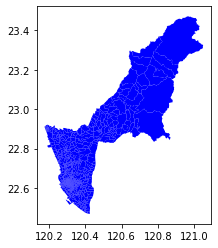

In [40]:
import geopandas as gpd

gdf = gpd.read_file('./tw_map/VILLAGE_MOI_121_1101214.shx',encoding='utf8')


kh = gdf[gdf.COUNTYNAME == '高雄市']
kh.crs = {'init' : 'epsg:3826'}
kh =  kh.to_crs(epsg=4326)
kh.plot(color='blue')

# 繪製出 高雄村里界圖

C:\Users\rxiau6-PC\.conda\envs\gis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

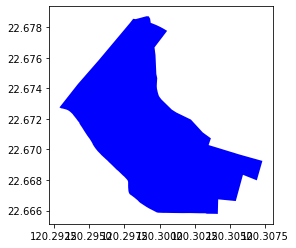

In [41]:
import geopandas as gpd

tw = gpd.read_file('./tw_map/VILLAGE_MOI_121_1101214.shx',encoding='utf8')


kh = tw[tw.COUNTYNAME == '高雄市']
kh.crs = {'init' : 'epsg:3826'}
kh =  kh.to_crs(epsg=4326)
vill = kh[kh.VILLNAME == '新下里']
vill.plot(color='blue')

# 繪製出 新下里界圖

<AxesSubplot:>

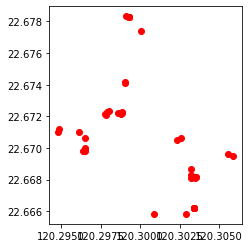

In [33]:

filtered = df
filtered['InVill'] = ""
InVillList = []

for x,y in zip(filtered[n1],filtered[n2]):
    pt = Point(x,y)
    InVill = pt.within(vill['geometry'].values[0])
    InVillList.append(InVill)

filtered['InVill'] = InVillList
# print(n0)
InVill_df = filtered[filtered.InVill==True]
# InVill_df.head(5)
geom = [Point(xy) for xy in zip(InVill_df[n1],InVill_df[n2])]
Xin_Xia = gpd.GeoDataFrame(InVill_df[n0],geometry=geom)

Xin_Xia.plot(color='red')
# 繪製出 新下里站點


<AxesSubplot:>

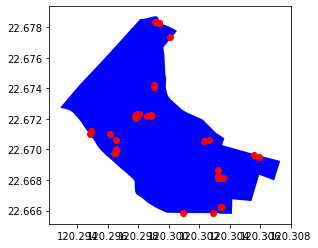

In [38]:
base=vill.plot(color='blue')
Xin_Xia.plot(ax=base,color='red')